In [1]:
import pandas as pd
import numpy as np
import sqlite3
from sklearn.impute import KNNImputer

In [8]:
# Imputation function using limited forward fill
def impute_with_limit(series):
   last_valid_index = series.last_valid_index()
   
   if series[last_valid_index] == np.nan:
      # If there are no valid values, return the original series
      return series
   else:
      return series[:last_valid_index + 1].ffill()

In [9]:
# Connect to the SQLite database
conn = sqlite3.connect('../data-src/final_data.db')

# Replace 'your_table' with the actual table name and 'conn' with your database connection
query = 'SELECT * FROM ALL_FEATURES'

# Use the pandas read_sql function to read the data into a DataFrame
events_df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Now, you can work with the DataFrame 'df'
events_df['date'] = pd.to_datetime(events_df['date'])
events_df

stock_df = pd.read_csv('stock_data.zip', compression='zip', header=[0, 1], index_col=0, parse_dates=True)
# stock_df.index = pd.to_datetime(stock_df.index, utc=True)
# stock_df = stock_df.ffill()


In [10]:
test = stock_df['RHHBY']
test

,open,high,low,close,volume,vwap,transactions
2010-01-04 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-10-25 04:00:00,32.95,33.140,32.58,32.84,3463818.0,32.9669,3621.0
2023-10-26 04:00:00,33.02,33.060,32.95,33.06,655294.0,32.9327,211.0
2023-10-27 04:00:00,33.07,33.100,32.76,32.87,4697347.0,32.8938,3985.0
2023-10-30 04:00:00,33.46,33.580,33.35,33.50,4610041.0,33.4047,3842.0


In [3]:
from importlib import reload, import_module
import yfinance as yf
from ncar import *

In [4]:
index_ticker = '^NBI'
reload(import_module('ncar'))
cols = ['open', 'high', 'low', 'close', 'volume', 'vwap', 'transactions']
index_data = yf.download(index_ticker, start="2009-01-01", end="2023-11-01")['Adj Close']
index_data.index = pd.to_datetime(index_data.index)
index_data = index_data.rename('NBI')
stockfpath = '../data-src/stock_data.zip'
eventdbpath = '../data-src/final_data.db'
eventtable = 'ALL_FEATURES'
period = 20
ncar_obj = NCARS(train_size=90, test_size=20, period=period, columns=cols, extra_data=index_data, 
                 stockfpath=stockfpath, eventdbpath=eventdbpath, eventtable=eventtable, lag=0)

ncars = ncar_obj.get_index_ncars(normalize=True)


[*********************100%***********************]  1 of 1 completed


c:\Users\shmit\Documents\Practice of QCF\RoBERTa-Biopharma-Trading\src\ncar.py:27: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  stock_data = pd.merge(stock_data, extra_data, left_index=True, right_index=True, how='inner')


In [19]:
reload(import_module('ncar'))

<module 'ncar' from 'c:\\Users\\shmit\\Documents\\Practice of QCF\\RoBERTa-Biopharma-Trading\\src\\ncar.py'>

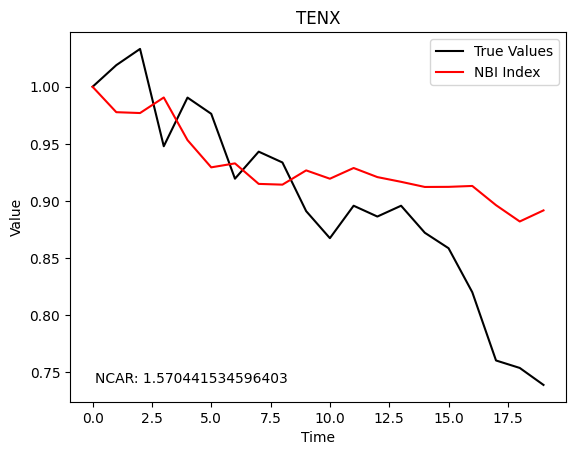

In [3]:
index=55
period=20
true, market = ncar_obj.get_event_data(index, period, normalize=True)
ticker = ncar_obj.eventdata.iloc[index]['ticker']
ncar_obj.plot_ncar(market, true, ticker)

In [64]:
test = ncar_obj.stockdata[['ABBV', 'EXTERNAL']]
test = test.droplevel(level=0, axis=1)
test

,open,high,low,close,volume,vwap,transactions,NBI
2009-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,741.729980
2009-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,744.869995
2009-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735.090027
2009-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,726.049988
2009-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,733.090027
...,...,...,...,...,...,...,...,...
2023-09-25,152.44,154.74,151.66,154.65,3740015.0,154.0688,54264.0,3933.840088
2023-09-26,154.40,154.60,153.33,153.91,3936257.0,153.9586,60096.0,3962.340088
2023-09-27,153.84,154.00,151.61,153.13,3621183.0,152.9482,56131.0,3976.409912
2023-09-28,153.64,153.83,151.37,152.25,3697512.0,152.2261,52378.0,3972.129883


In [7]:
ncar_obj.eventdata = ncar_obj.eventdata.drop(['NCAR'], axis=1)

In [9]:
ncar_obj.eventdata['NCAR_20'] = ncars.reset_index(drop=True)
df = ncar_obj.eventdata

In [12]:
import pandas as pd
import sqlite3

# Create a Pandas DataFrame (replace this with your actual DataFrame)
# SQLite database file path
db_file_path = '../data-src/final_data.db'

# SQLite connection
conn = sqlite3.connect(db_file_path)

# Use the to_sql method to write the DataFrame to a new table in the SQLite database
# if_exists='replace' will replace the table if it already exists, you can use 'fail' or 'append' if needed
df.to_sql(name='ALL_FEATURES', con=conn, index=False, if_exists='replace')

# Close the connection
conn.close()
